In [1]:
import numpy as np
from numpy import random
import pandas as pd
from collections import Counter
import scipy
from scipy import stats
from scipy.stats import binom , poisson , norm , t
from matplotlib import pyplot as plt
import pylab
from pylab import legend, plot, show, title, xlabel, ylabel
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the dataset

application_data = pd.read_csv("application_data.csv")
application_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
application_data.shape

(307511, 122)

In [5]:
application_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [6]:
pd.set_option('Display.max_columns',None)
pd.set_option('Display.max_rows',None)
print(application_data.dtypes)

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [7]:
#percentage pf null values
(application_data.isnull().sum()/len(application_data.index))*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [8]:
# Drop columns with > 50% missing values
application_data = application_data.loc[:, application_data.isnull().mean() <= 0.5]

In [9]:
application_data.shape

(307511, 81)

In [10]:
#percentage pf null values after dropping the 50% null values
(application_data.isnull().sum()/len(application_data.index))*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

In [11]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#cheaking the null value for AMT_GOODS_PRICE
application_data["AMT_GOODS_PRICE"].isnull().sum()

np.int64(278)

In [13]:
#we fill the values using the median 
application_data["AMT_GOODS_PRICE"].median()

np.float64(450000.0)

In [14]:
#filling the null value with median
application_data["AMT_GOODS_PRICE"] = application_data["AMT_GOODS_PRICE"].fillna(application_data["AMT_GOODS_PRICE"].median())

In [15]:
#cheaking the null values
application_data["AMT_GOODS_PRICE"].isnull().sum()

np.int64(0)

In [16]:
#cheaking the null value for NAME_TYPE_SUITE
application_data["NAME_TYPE_SUITE"].isnull().sum()

np.int64(1292)

In [17]:
application_data["NAME_TYPE_SUITE"].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [18]:
application_data["NAME_TYPE_SUITE"].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [19]:
application_data["NAME_TYPE_SUITE"] = application_data["NAME_TYPE_SUITE"].fillna("Unaccompanied")

In [20]:
#cheaking the null value for NAME_TYPE_SUITE
application_data["NAME_TYPE_SUITE"].isnull().sum()

np.int64(0)

In [21]:
#cheaking the null value for AMT_ANNUITY
application_data["AMT_ANNUITY"].isnull().sum()

np.int64(12)

In [22]:
#Imputing with median again
application_data["AMT_ANNUITY"].median()

np.float64(24903.0)

In [23]:
application_data["AMT_ANNUITY"] = application_data["AMT_ANNUITY"].fillna(0)

In [24]:
#cheaking the null value for AMT_ANNUITY
application_data["AMT_ANNUITY"].isnull().sum()

np.int64(0)

In [25]:
#cheaking the null value for OCCUPATION_TYPE
application_data["OCCUPATION_TYPE"].isnull().sum()

np.int64(96391)

In [26]:
application_data.shape

(307511, 81)

In [27]:
#Columns that we decided will not help in analysis of finding defaulters
application_data.drop([ "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "FLAG_EMAIL", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "DAYS_LAST_PHONE_CHANGE","FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21", "EXT_SOURCE_2", "EXT_SOURCE_3", "YEARS_BEGINEXPLUATATION_AVG", "FLOORSMAX_AVG", "YEARS_BEGINEXPLUATATION_MODE", "FLOORSMAX_MODE", "YEARS_BEGINEXPLUATATION_MEDI", "FLOORSMAX_MEDI", "TOTALAREA_MODE", "EMERGENCYSTATE_MODE"], axis=1, inplace = True)


In [28]:
application_data.drop(columns=["FLAG_OWN_CAR","CNT_CHILDREN","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","CNT_FAM_MEMBERS","WEEKDAY_APPR_PROCESS_START",
                               "HOUR_APPR_PROCESS_START","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK"], axis=1, inplace = True)

In [29]:
application_data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_REALTY                    0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96391
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_LIVE_CITY             0
REG_CITY_NOT_WORK_CITY             0
LIVE_CITY_NOT_WORK_CITY            0
ORGANIZATION_TYPE                  0
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
O

In [30]:
# filling the occupation null values with considering the mode
occupation_mode = application_data["OCCUPATION_TYPE"].mode()[0]
occupation_mode

'Laborers'

In [31]:
application_data['OCCUPATION_TYPE'].fillna(occupation_mode, inplace = True)

In [32]:
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].median()

np.float64(1.0)

In [33]:
#filling the null value with median
application_data["OBS_30_CNT_SOCIAL_CIRCLE"] = application_data["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(application_data["OBS_30_CNT_SOCIAL_CIRCLE"].median())

In [34]:
#filling the null value with median
application_data["DEF_30_CNT_SOCIAL_CIRCLE"] = application_data["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(application_data["DEF_30_CNT_SOCIAL_CIRCLE"].median())

In [35]:
#filling the null value with median
application_data["OBS_60_CNT_SOCIAL_CIRCLE"] = application_data["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(application_data["OBS_60_CNT_SOCIAL_CIRCLE"].median())

In [36]:
#filling the null value with median
application_data["DEF_60_CNT_SOCIAL_CIRCLE"] = application_data["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(application_data["DEF_60_CNT_SOCIAL_CIRCLE"].median())

In [37]:
#filling the null value with median
application_data["AMT_REQ_CREDIT_BUREAU_MON"] = application_data["AMT_REQ_CREDIT_BUREAU_MON"].fillna(application_data["AMT_REQ_CREDIT_BUREAU_MON"].median())

In [38]:
#filling the null value with median
application_data["AMT_REQ_CREDIT_BUREAU_QRT"] = application_data["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(application_data["AMT_REQ_CREDIT_BUREAU_QRT"].median())

In [39]:
#filling the null value with median
application_data["AMT_REQ_CREDIT_BUREAU_YEAR"] = application_data["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(application_data["AMT_REQ_CREDIT_BUREAU_YEAR"].median())

In [40]:
#application_data.drop(columns=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH'],axis=1, inplace=True)

In [41]:
application_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_REALTY                0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
OCCUPATION_TYPE                0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATION_TYPE              0
OBS_30_CNT_SOCIAL_CIRCLE       0
DEF_30_CNT_SOCIAL_CIRCLE       0
OBS_60_CNT_SOCIAL_CIRCLE       0
DEF_60_CNT_SOCIAL_CIRCLE       0
AMT_REQ_CREDIT_BUREAU_MON      0
AMT_REQ_CR

In [42]:
application_data.shape

(307511, 32)

In [43]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307511 non-null  float64
 8   AMT_GOODS_PRICE              307511 non-null  float64
 9   NAME_TYPE_SUITE              307511 non-null  object 
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_HOUSING_TYPE            307511 non-null  object 
 12  REGION_POPULATION_RELATIVE   307511 non-null  float64
 13 

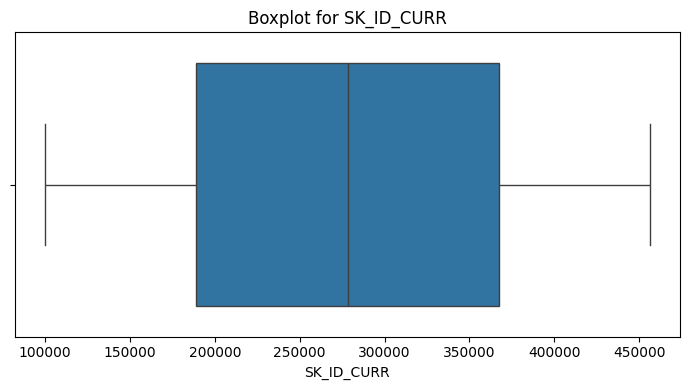

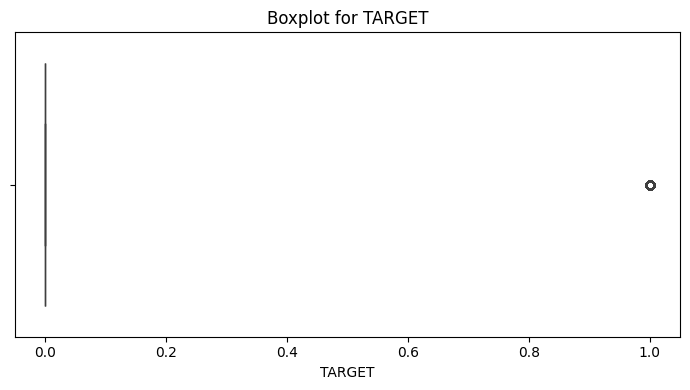

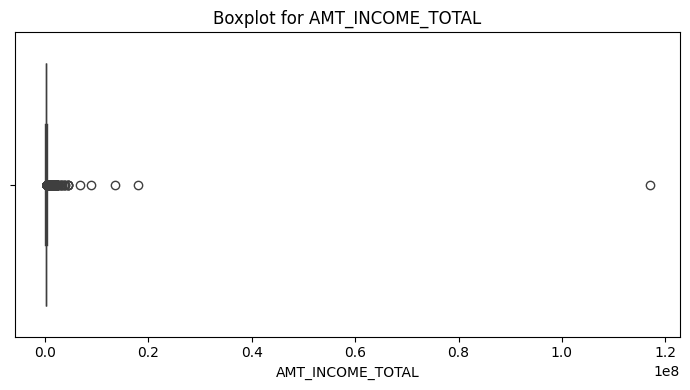

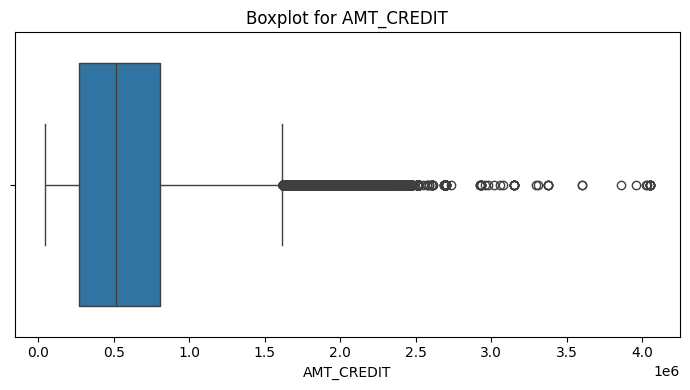

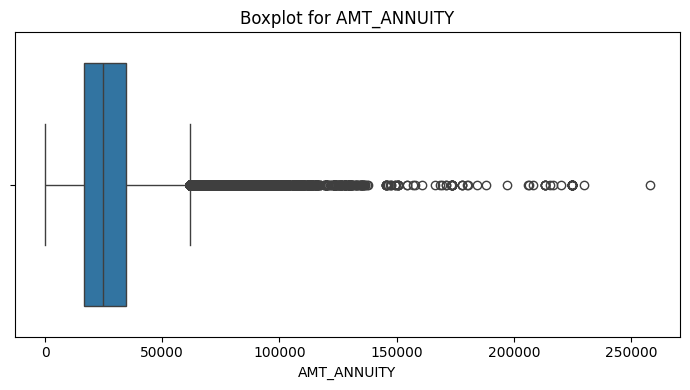

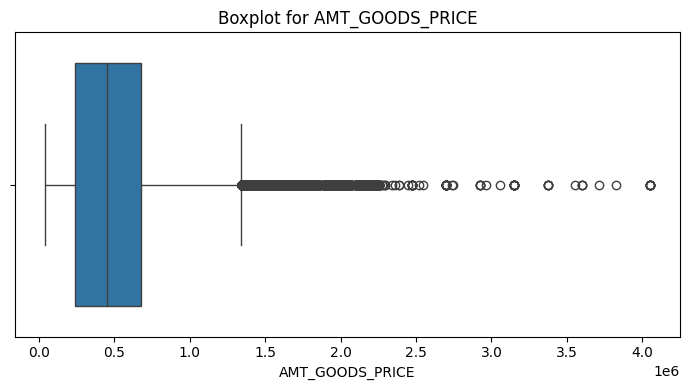

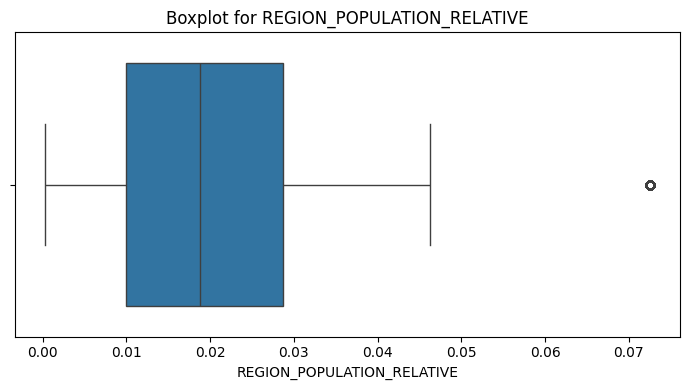

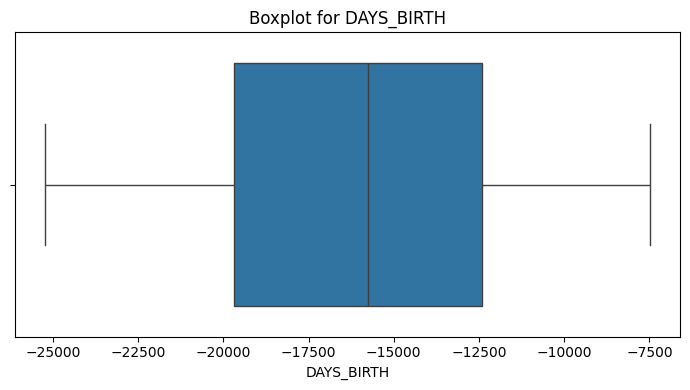

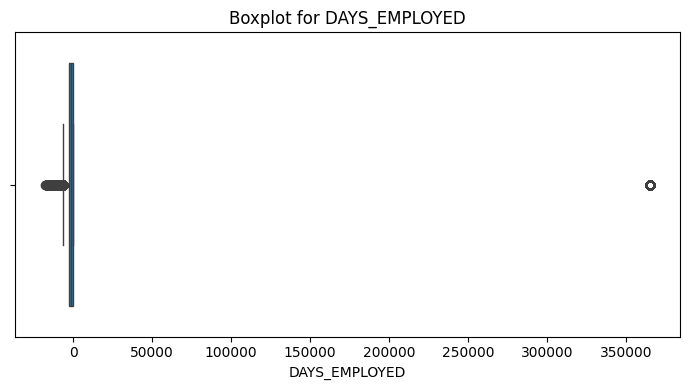

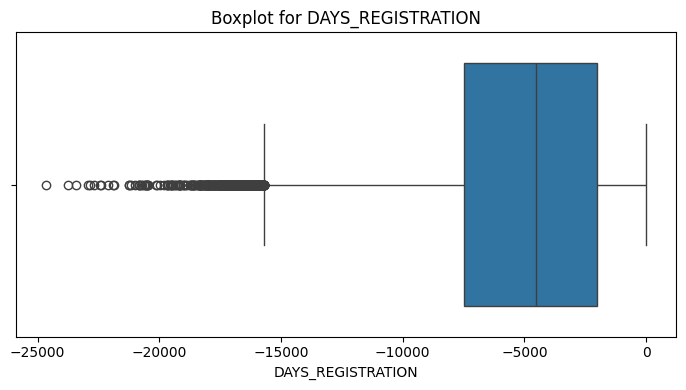

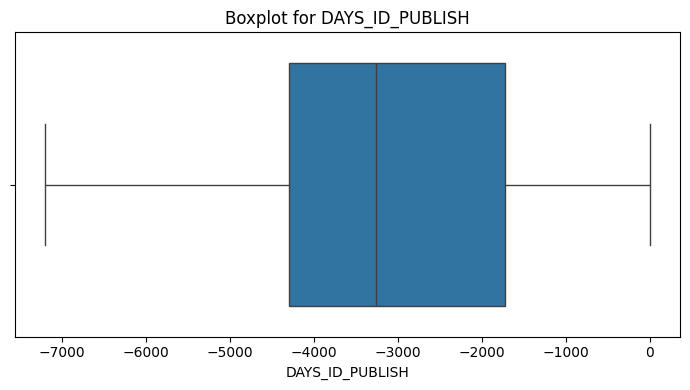

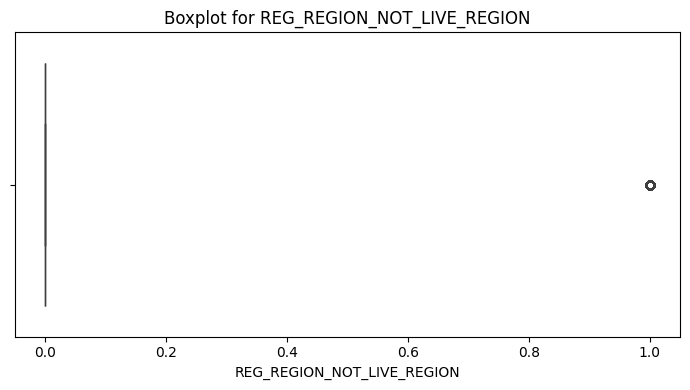

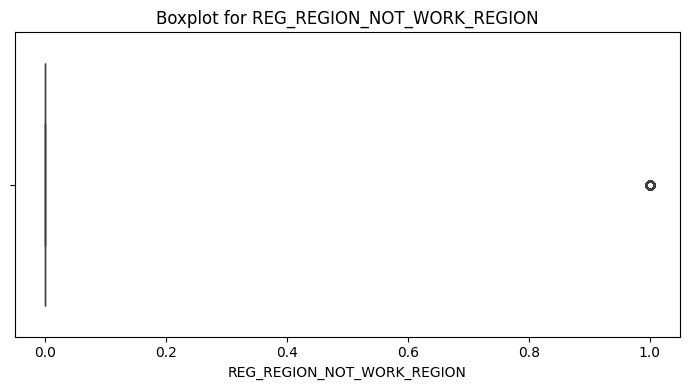

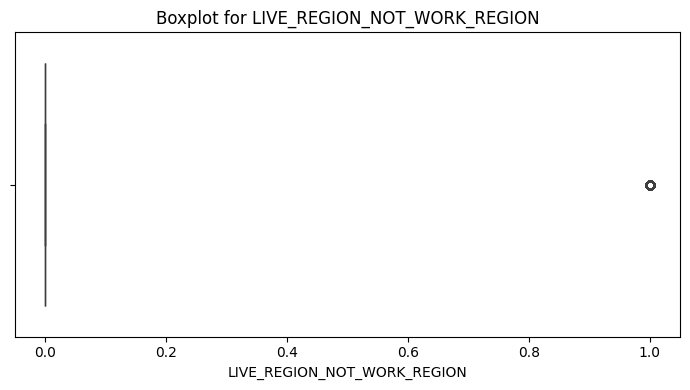

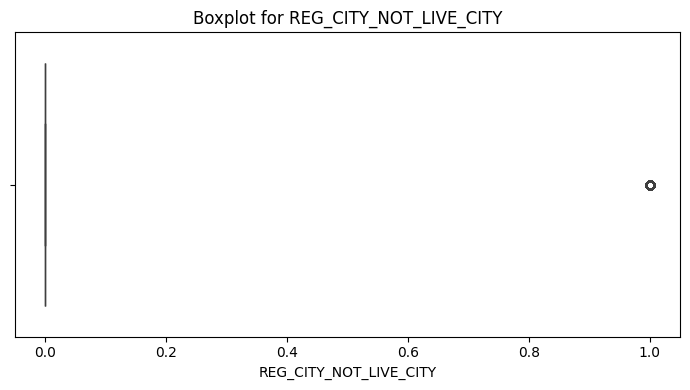

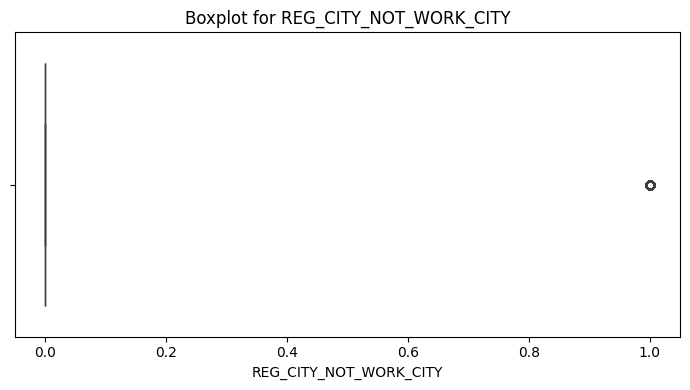

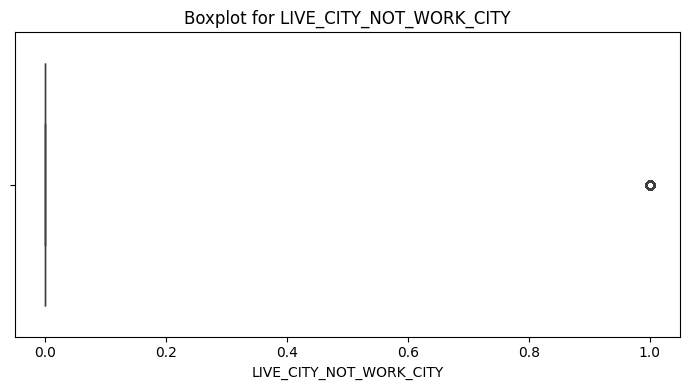

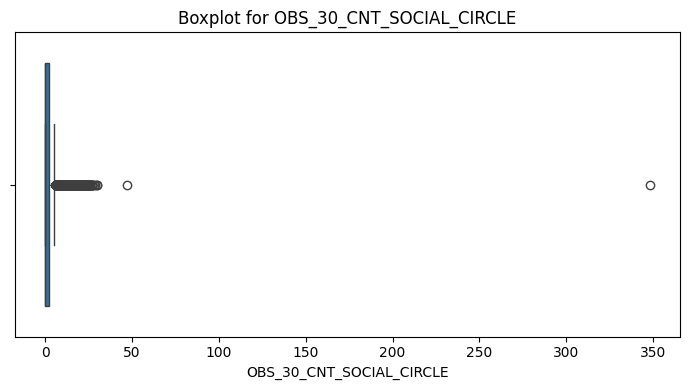

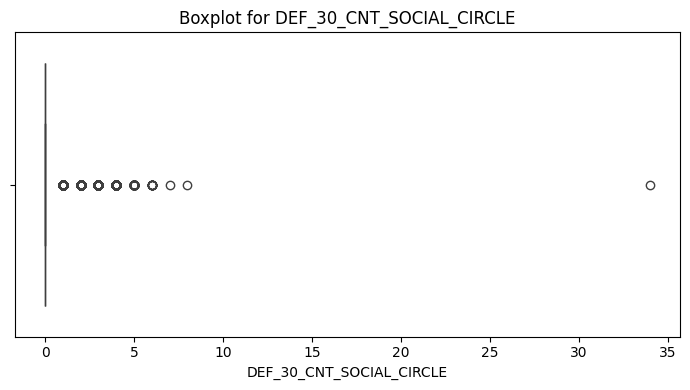

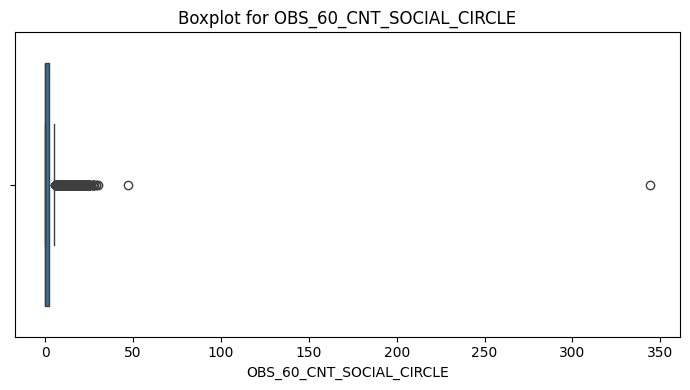

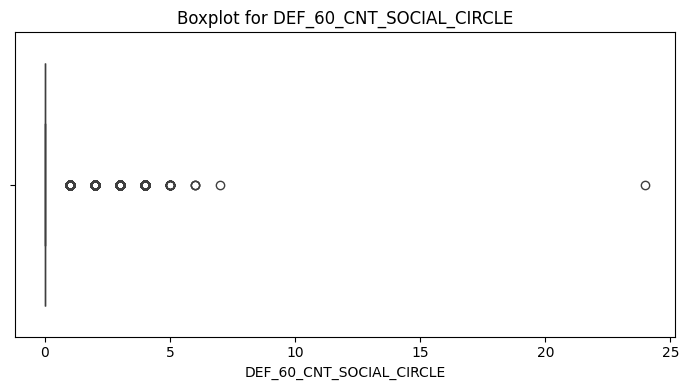

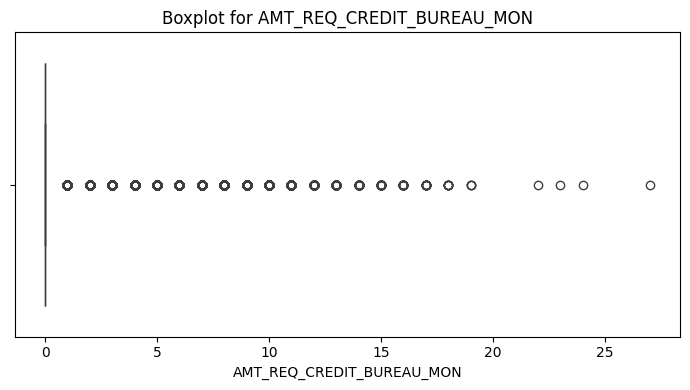

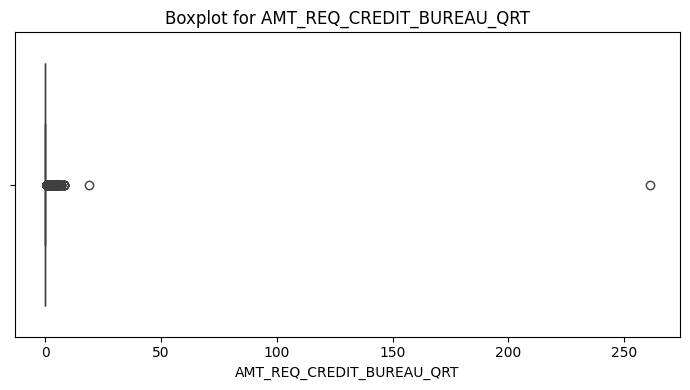

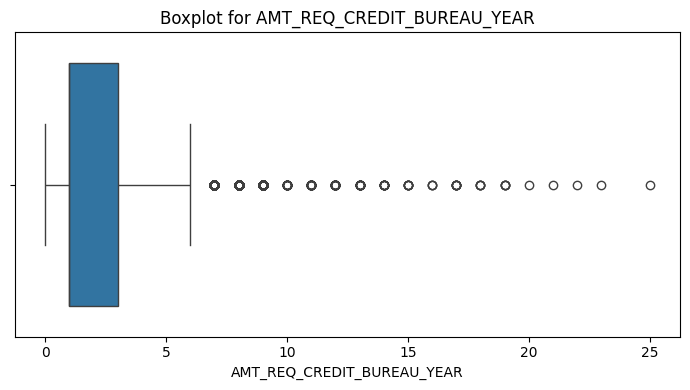

In [44]:
# Select numerical columns
numerical_cols = application_data.select_dtypes(include=['number']).columns

# Loop through numerical columns and create boxplots
for col in numerical_cols:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=application_data[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()  # Ensure no non-breaking spaces are here

## Cheaking Outliers

In [45]:
# Assuming app_data is your original DataFrame (replace it with the appropriate DataFrame)
outlier_df = application_data.copy()  # Create a copy of the original dataset

# Select numerical columns from the DataFrame
numerical_cols = outlier_df.select_dtypes(include=['number']).columns

# Define the function to remove outliers
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter the DataFrame to keep rows within the bounds for the current column
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df  # Return the cleaned DataFrame after processing all columns

# Call the function with the correct DataFrame and columns
cleaned_df = remove_outliers(outlier_df, numerical_cols)

# Check the cleaned dataset
print(f"Original dataset size: {outlier_df.shape}")
print(f"Cleaned dataset size: {cleaned_df.shape}")

Original dataset size: (307511, 32)
Cleaned dataset size: (58878, 32)


## PREVIOUS_APPLICATION_DATA

In [48]:
# importing the dataset

df_previousapp = pd.read_csv("previous_application.csv")
df_previousapp.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df_previousapp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [50]:
df_previousapp.shape

(1670214, 37)

In [51]:
df_previousapp.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
#pd.options.display.min_rows = 130 #to display all the columns instead of a summary
df_previousapp.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [53]:
#precentage of null values
(df_previousapp.isnull().sum()/len(df_previousapp.index))*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

#### INFERNCE:
Way too many columns have missing data.

#### OPTIONS:
1.Impute values in columns having % of missing values < 50

2.Delete columns having more than %50 missing values as they cannot help in analysis.

#### DATA CLEANING

In [54]:
#Remove the data where more than 40% Null values
df_previousapp = df_previousapp.drop(["AMT_DOWN_PAYMENT", "RATE_INTEREST_PRIMARY", "RATE_DOWN_PAYMENT", "RATE_INTEREST_PRIVILEGED"], axis=1)

In [55]:
#precentage of null values
(df_previousapp.isnull().sum()/len(df_previousapp.index))*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT     

#### TREATING MISSING VALUES (Column wise)

(Loan annuity of previous application)

In [56]:
#cheaking the null value for AMT_ANNUITY 
df_previousapp["AMT_ANNUITY"].isnull().sum()

np.int64(372235)

In [57]:
#We can see most values lie between min and 50%. 
#Using median to impute missing values as mean would skew the data

df_previousapp["AMT_ANNUITY"].median(skipna = True)

np.float64(11250.0)

In [58]:
df_previousapp["AMT_ANNUITY"] = df_previousapp["AMT_ANNUITY"].fillna(df_previousapp["AMT_ANNUITY"].median(skipna = True))

In [59]:
#precentage of null values
(df_previousapp.isnull().sum()/len(df_previousapp.index))*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                     0.000000
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT     

In [60]:
#cheaking the null value for AMT_GOODS_PRICE
df_previousapp["AMT_GOODS_PRICE"].isnull().sum()

np.int64(385515)

In [61]:
df_previousapp["AMT_GOODS_PRICE"].median(skipna = True)

np.float64(112320.0)

In [62]:
df_previousapp["AMT_GOODS_PRICE"] = df_previousapp["AMT_GOODS_PRICE"].fillna(df_previousapp["AMT_GOODS_PRICE"].median(skipna = True))

In [63]:
#cheaking the null value for NAME_TYPE_SUITE
df_previousapp["NAME_TYPE_SUITE"].isnull().sum()

np.int64(820405)

In [64]:
df_previousapp["NAME_TYPE_SUITE"] = df_previousapp["NAME_TYPE_SUITE"].fillna(df_previousapp["NAME_TYPE_SUITE"].mode()[0])

In [65]:
#filling the null value for CNT_PAYMENT
df_previousapp["CNT_PAYMENT"] = df_previousapp["CNT_PAYMENT"].fillna(df_previousapp["CNT_PAYMENT"].median(skipna = True))

In [66]:
#filling the null value for PRODUCT_COMBINATION
df_previousapp["PRODUCT_COMBINATION"] = df_previousapp["PRODUCT_COMBINATION"].fillna(df_previousapp["PRODUCT_COMBINATION"].mode()[0])

In [67]:
#filling the null value for DAYS_FIRST_DRAWING
df_previousapp["DAYS_FIRST_DRAWING"] = df_previousapp["DAYS_FIRST_DRAWING"].fillna(df_previousapp["DAYS_FIRST_DRAWING"].median(skipna = True))

In [68]:
#filling the null values for DAYS_FIRST_DUE
df_previousapp["DAYS_FIRST_DUE"] = df_previousapp["DAYS_FIRST_DUE"].fillna(df_previousapp["DAYS_FIRST_DUE"].median(skipna = True))

In [69]:
#filling the null values for DAYS_FIRST_DUE
df_previousapp["DAYS_LAST_DUE_1ST_VERSION"] = df_previousapp["DAYS_LAST_DUE_1ST_VERSION"].fillna(df_previousapp["DAYS_LAST_DUE_1ST_VERSION"].median(skipna = True))

In [70]:
#filling the null values for DAYS_FIRST_DUE
df_previousapp["DAYS_LAST_DUE"] = df_previousapp["DAYS_LAST_DUE"].fillna(df_previousapp["DAYS_LAST_DUE"].median(skipna = True))

In [71]:
#filling the null values for DAYS_FIRST_DUE
df_previousapp["DAYS_TERMINATION"] = df_previousapp["DAYS_TERMINATION"].fillna(df_previousapp["DAYS_TERMINATION"].median(skipna = True))

In [72]:
#filling the null values for DAYS_FIRST_DUE
df_previousapp["AMT_CREDIT"] = df_previousapp["AMT_CREDIT"].fillna(df_previousapp["AMT_CREDIT"].median(skipna = True))

In [73]:
#filling the null values for DAYS_FIRST_DUE
df_previousapp["NFLAG_INSURED_ON_APPROVAL"] = df_previousapp["NFLAG_INSURED_ON_APPROVAL"].fillna(df_previousapp["NFLAG_INSURED_ON_APPROVAL"].median(skipna = True))

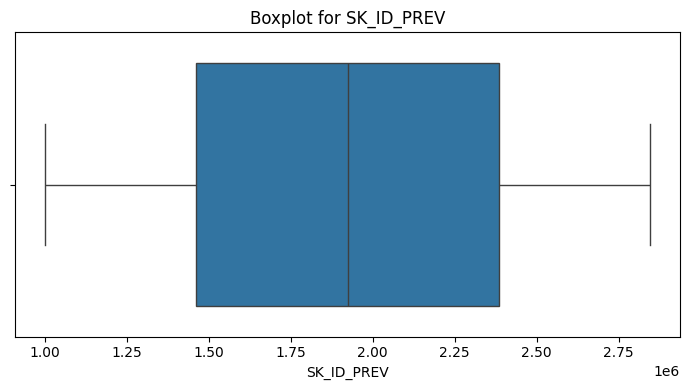

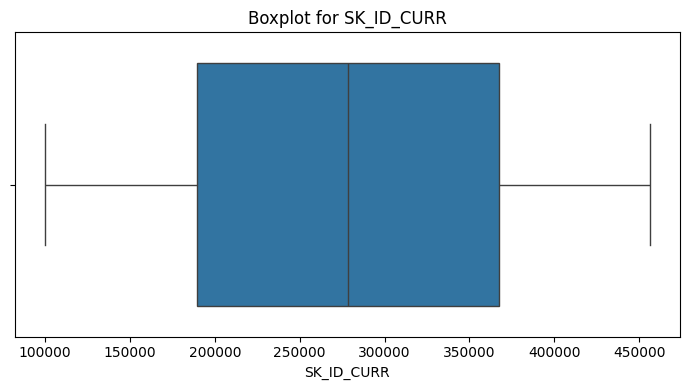

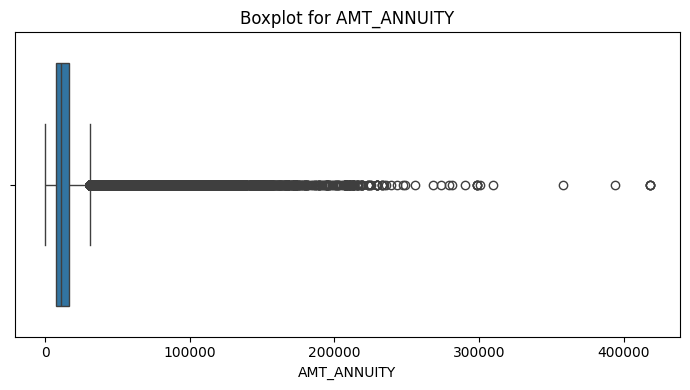

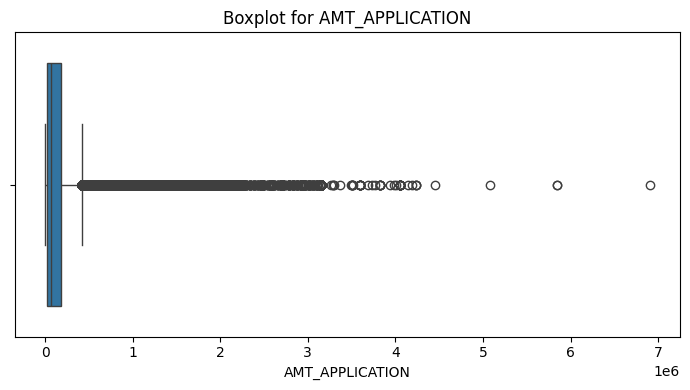

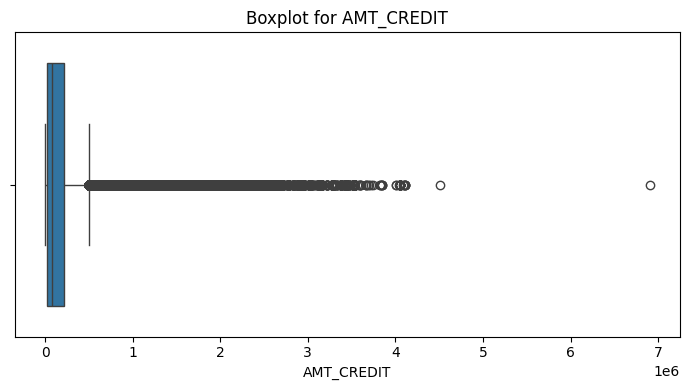

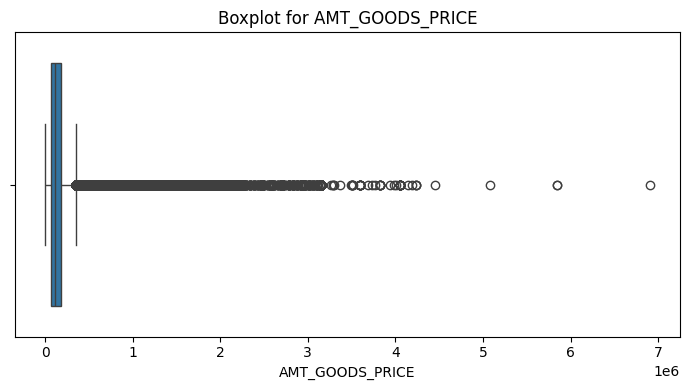

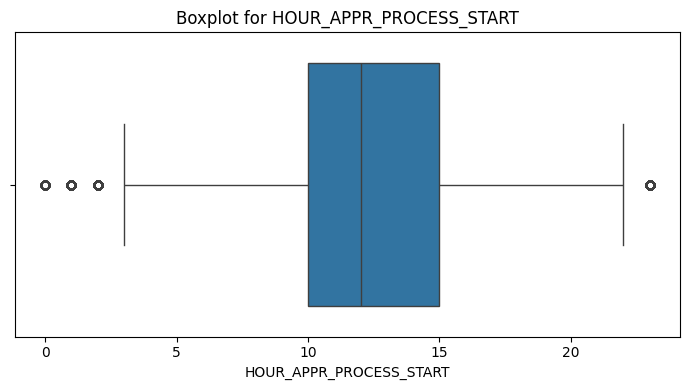

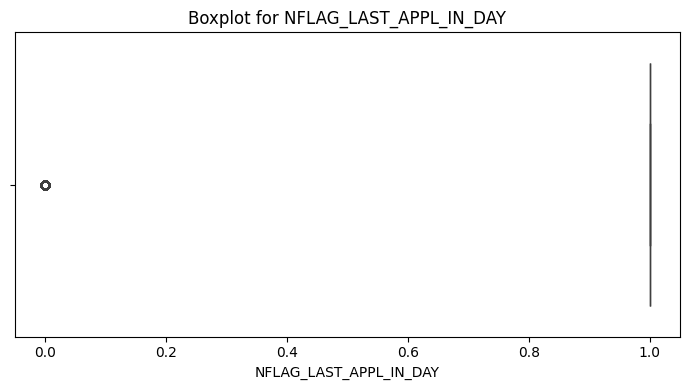

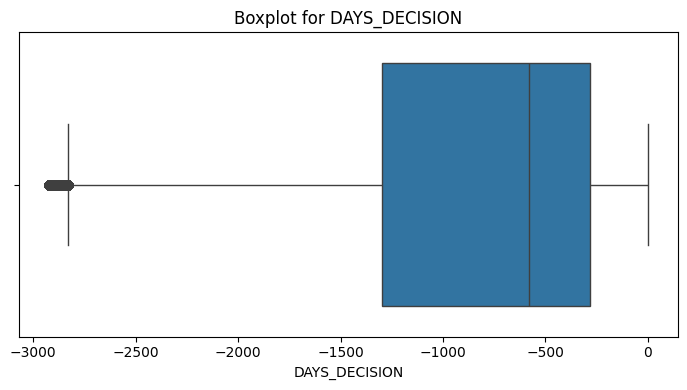

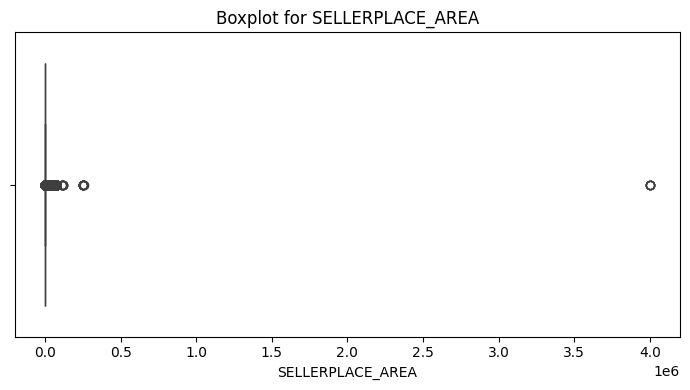

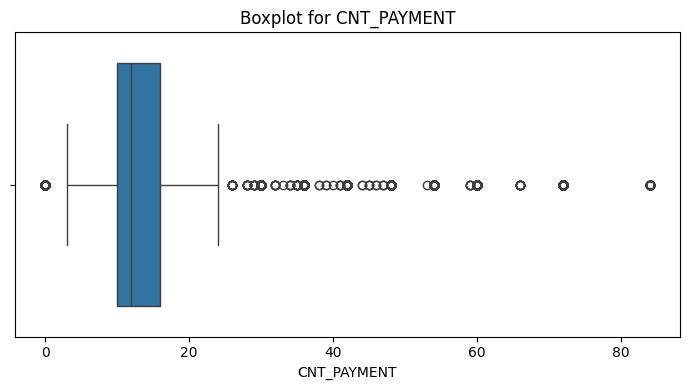

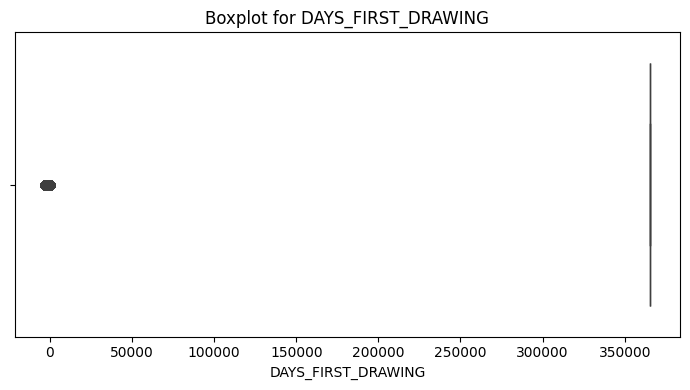

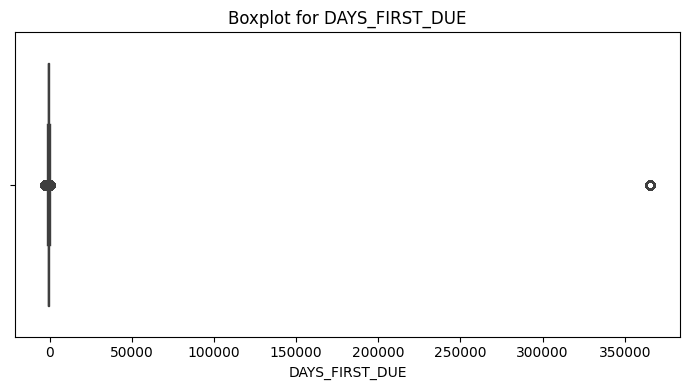

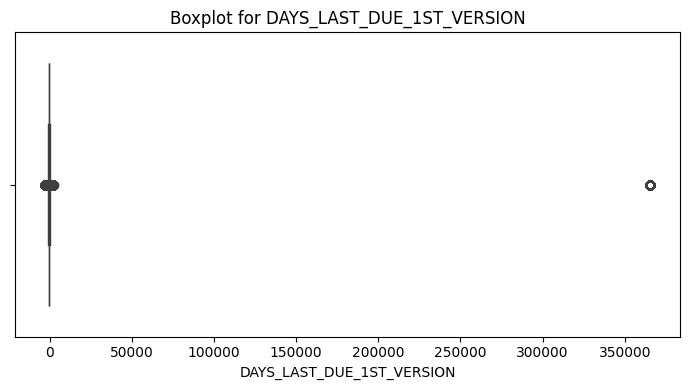

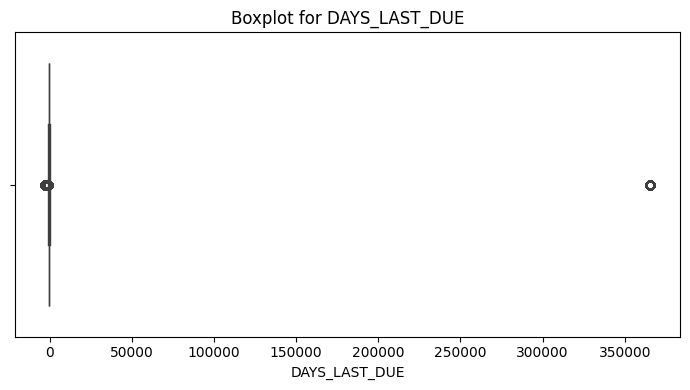

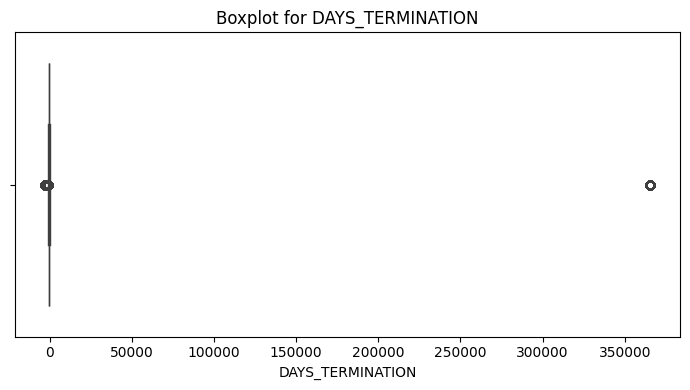

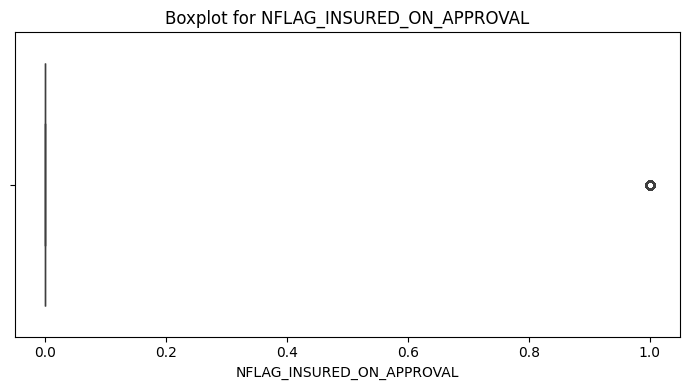

In [74]:
# Select numerical columns
numerical_cols = df_previousapp.select_dtypes(include=['number']).columns

# Loop through numerical columns and create boxplots
for col in numerical_cols:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=df_previousapp[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()  # Ensure no non-breaking spaces are here

In [75]:
# Assuming app_data is your original DataFrame (replace it with the appropriate DataFrame)
outlier_df = df_previousapp.copy()  # Create a copy of the original dataset

# Select numerical columns from the DataFrame
numerical_cols = outlier_df.select_dtypes(include=['number']).columns

# Define the function to remove outliers
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter the DataFrame to keep rows within the bounds for the current column
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df  # Return the cleaned DataFrame after processing all columns

# Call the function with the correct DataFrame and columns
cleaned_df = remove_outliers(outlier_df, numerical_cols)

# Check the cleaned dataset
print(f"Original dataset size: {outlier_df.shape}")
print(f"Cleaned dataset size: {cleaned_df.shape}")

Original dataset size: (1670214, 33)
Cleaned dataset size: (433581, 33)


## DATA ANALYSIS:-

####  Distribution of Target Variable (Defaulters vs. Non-Defaulters)
Expected Insight: If the dataset is imbalanced, it may need oversampling or analysis adjustments to focus on the minority class (e.g., defaulters).

#### Numerical Column Distribution

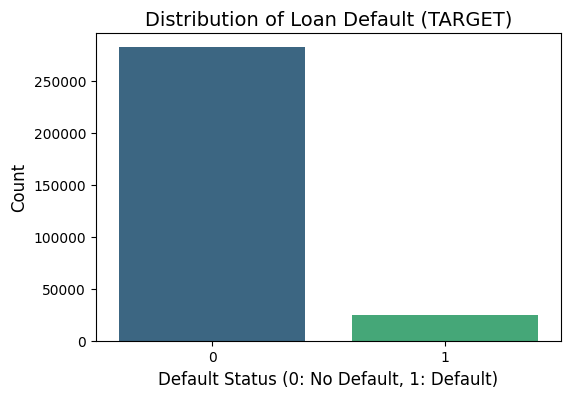

In [79]:
# Plot target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='TARGET', data=application_data, palette='viridis')
plt.title('Distribution of Loan Default (TARGET)', fontsize=14)
plt.xlabel('Default Status (0: No Default, 1: Default)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

Conclusions: Target Variable: If the dataset has a class imbalance in TARGET, oversampling (e.g., SMOTE) or undersampling may be required before building models.

####  Categorical Variable Distribution:-
Columns like NAME_CONTRACT_TYPE, CODE_GENDER, and FLAG_OWN_REALTY are categorical. These can provide insights into demographic and behavioral factors.

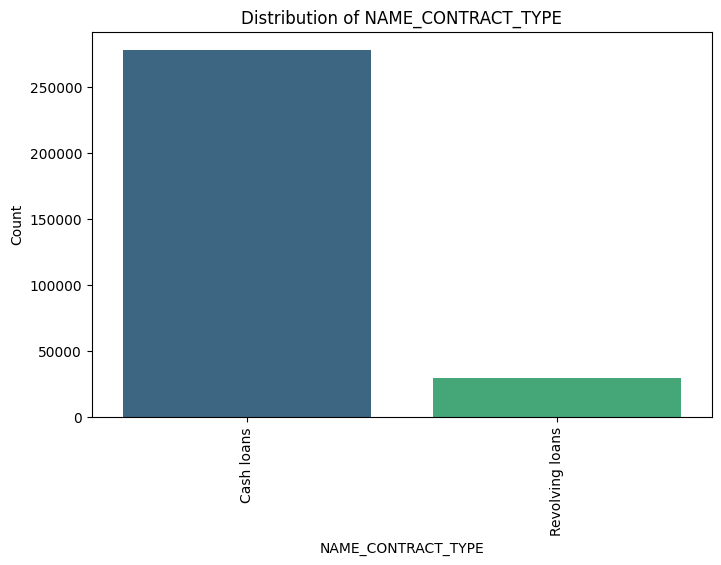

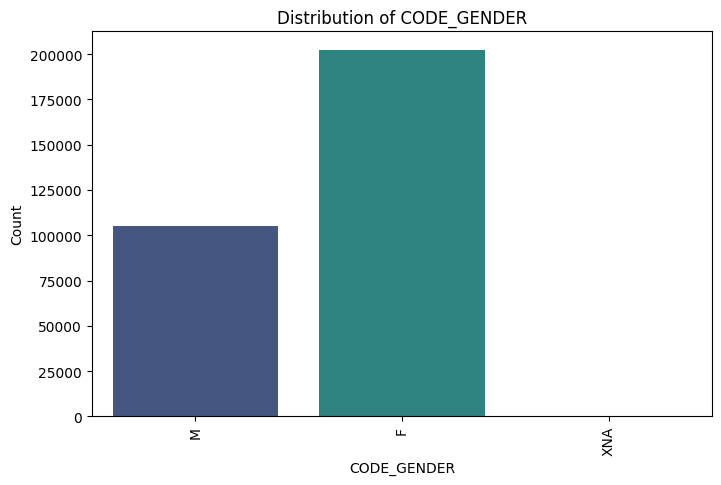

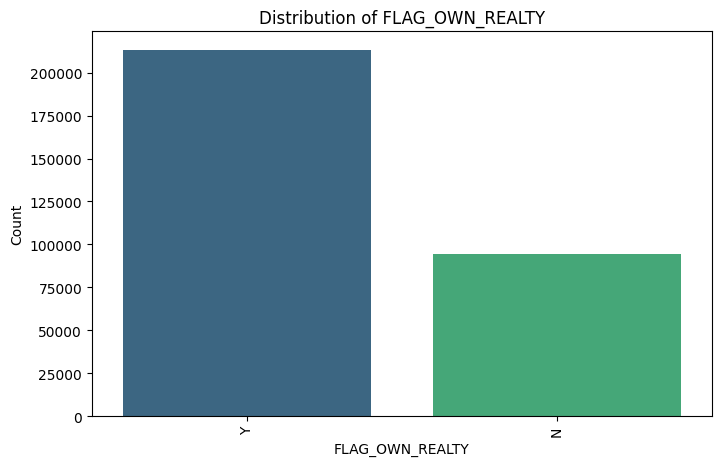

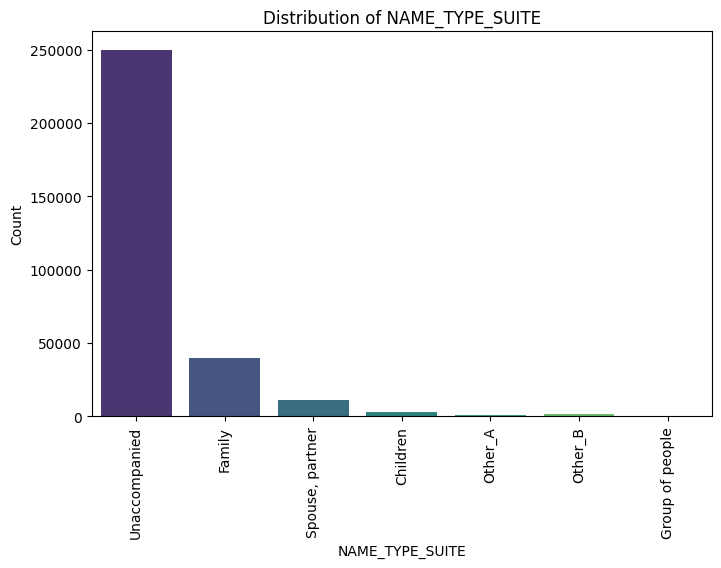

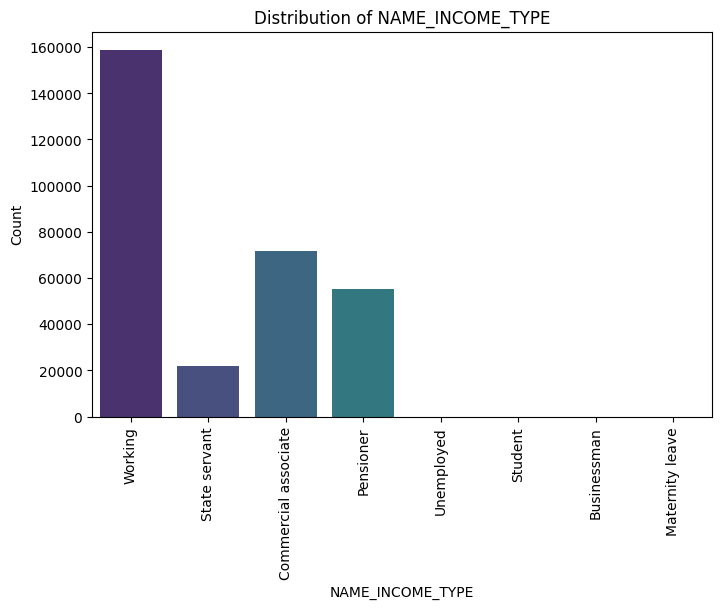

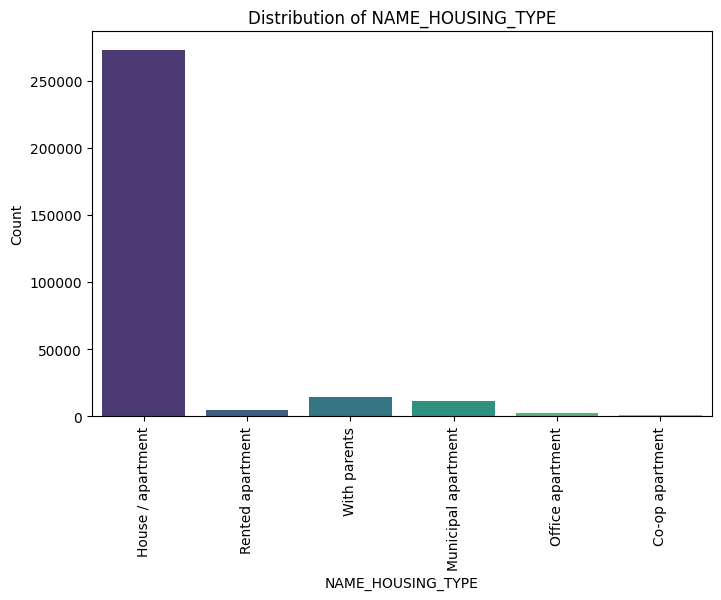

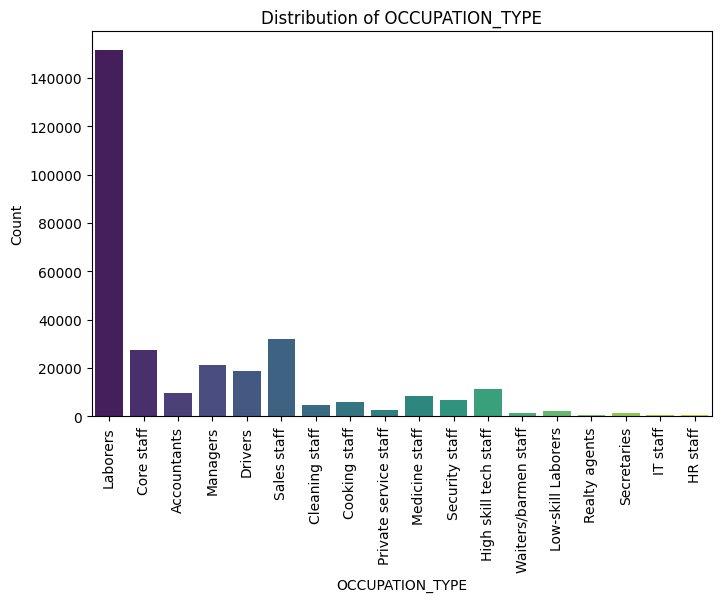

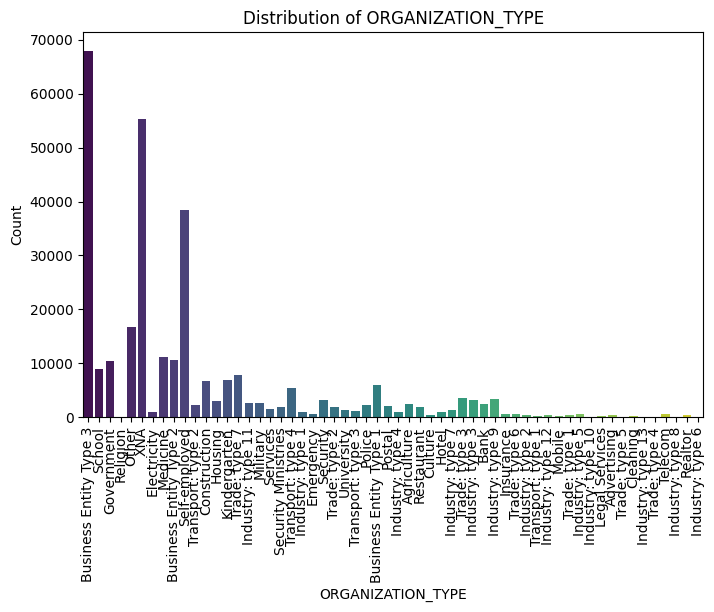

In [93]:
# Categorical Variable Distribution
categorical_columns = application_data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=application_data, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

Conclsion

Categorical Features: Variables like CODE_GENDER or NAME_INCOME_TYPE could be used to segment customers and analyze their behavior further.

#### Gender Distribution:-
The chart shows how loan defaults are distributed across gender categories (CODE_GENDER). Higher Defaults Among Males: The default rate is higher in males than in females. More males in the dataset appear to have defaulted.

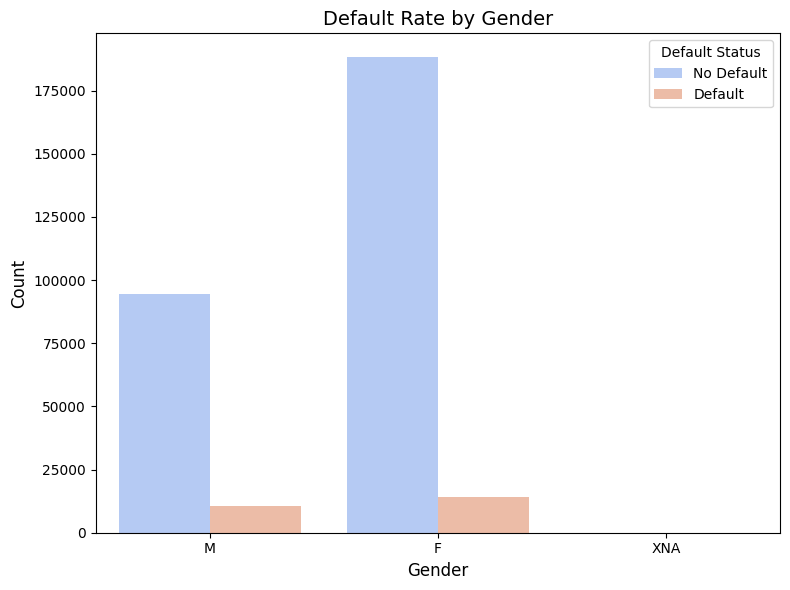

In [97]:
plt.figure(figsize=(8, 6))
sns.countplot(
    data=application_data, 
    x='CODE_GENDER', 
    hue='TARGET', 
    palette='coolwarm' 
)
plt.title('Default Rate by Gender', fontsize=14)  
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Default Status', labels=['No Default', 'Default'], fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Conclusion:-
The graph shows that females have a lower default rate compared to males. It highlights that gender plays a role in loan repayment behavior, with women being more reliable borrowers.

Insight - Higher Defaults in Pensioners and Commercial Associates: The chart reveals that pensioners and commercial associates show a higher default rate.

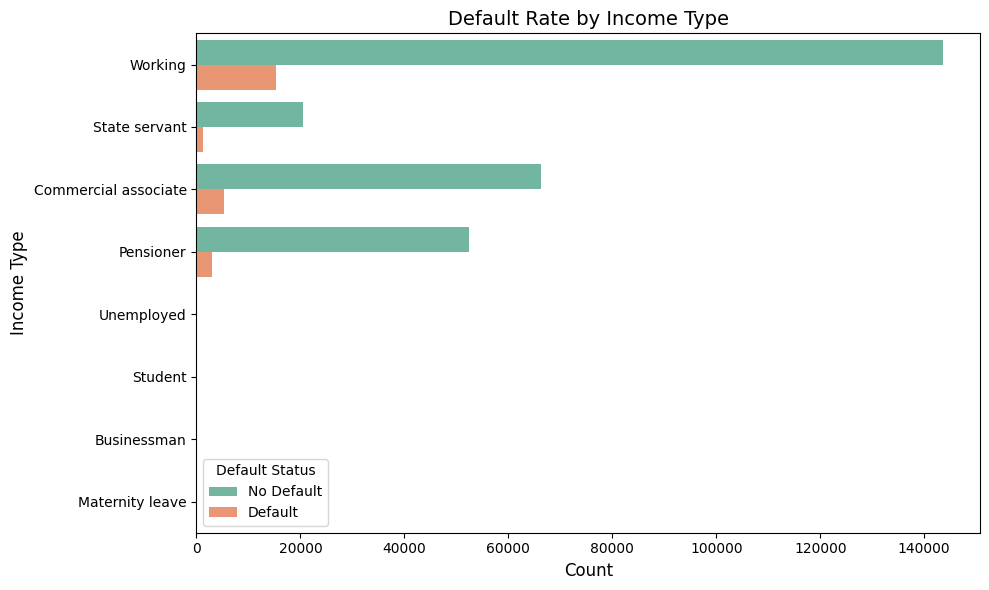

In [100]:
plt.figure(figsize=(10, 6))  
sns.countplot(
    data=application_data, 
    y='NAME_INCOME_TYPE',  
    hue='TARGET', 
    palette='Set2' 
)
plt.title('Default Rate by Income Type', fontsize=14) 
plt.xlabel('Count', fontsize=12)
plt.ylabel('Income Type', fontsize=12)
plt.legend(title='Default Status', labels=['No Default', 'Default'], fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


##### Occupation Type vs. Default Rate


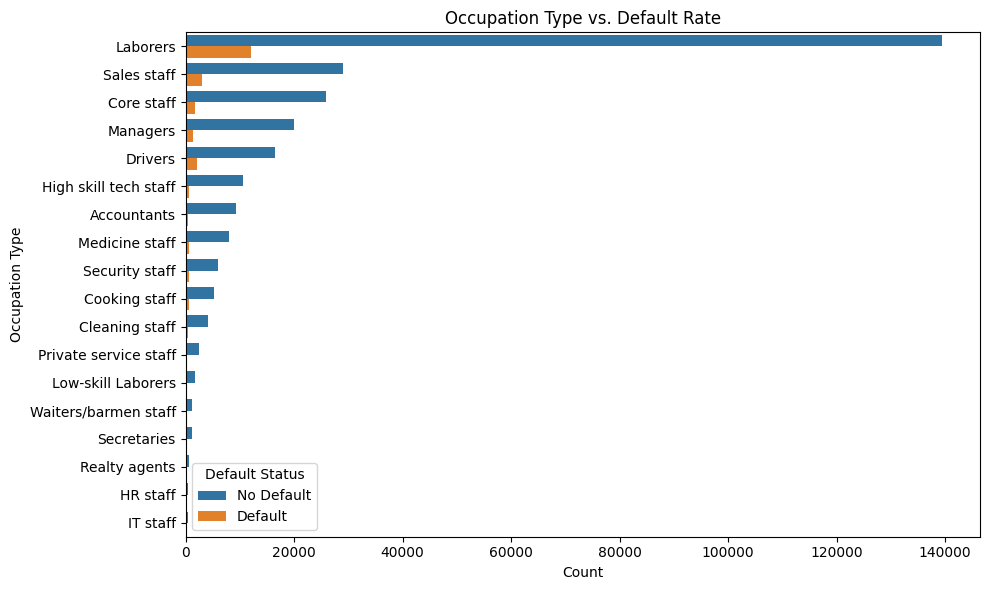

In [103]:
plt.figure(figsize=(10, 6))
sns.countplot(data=application_data, y='OCCUPATION_TYPE', hue='TARGET', order=application_data['OCCUPATION_TYPE'].value_counts().index)
plt.title('Occupation Type vs. Default Rate')
plt.xlabel('Count')
plt.ylabel('Occupation Type')
plt.legend(title='Default Status', labels=['No Default', 'Default'])
plt.tight_layout()
plt.show() 

#### Analysis for Previous Application Data

##### Categorical Variable Distribution

This shows the frequency of each category and can help identify any dominant categories or imbalanced data.

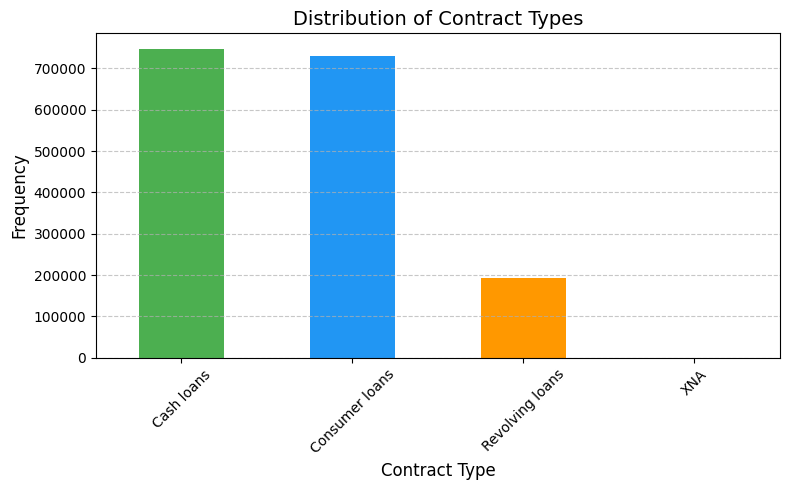

In [109]:
# prev_app['NAME_CONTRACT_TYPE'].value_counts().plot(kind='bar')
# plt.title('Distribution of Contract Types')
# plt.xlabel('Contract Type')
# plt.ylabel('Frequency')
# plt.show()
plt.figure(figsize=(8, 5))  
df_previousapp['NAME_CONTRACT_TYPE'].value_counts().plot(kind='bar', color=['#4caf50', '#2196f3', '#ff9800', '#9c27b0']  )
plt.title('Distribution of Contract Types', fontsize=14)  
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, fontsize=10)  
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.show()

Conclusion:-The majority of the loans are of the "Cash loans" type, significantly outnumbering other contract types. This indicates that customers primarily prefer cash loans over other options.

Boxplots for Numerical Variables

Boxplots reveal the presence of outliers and the spread of the data. It's useful to spot extreme values in the columns that might need cleaning or adjustment.

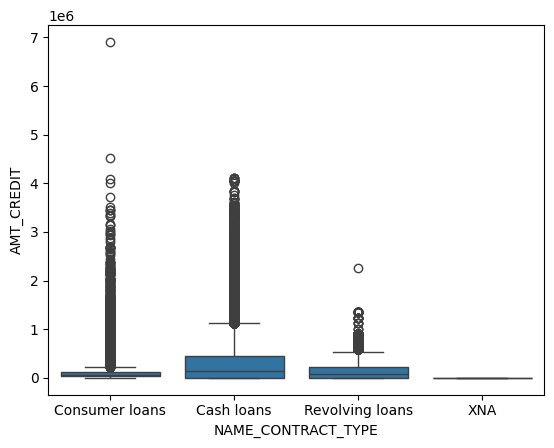

In [112]:
sns.boxplot(x='NAME_CONTRACT_TYPE', y='AMT_CREDIT', data=df_previousapp)
plt.show()

Conclusion:- If there are significant outliers in AMT_GOODS_PRICE, for example, you might need to decide whether to cap or remove those values

Countplot for Categorical Variables:- Countplots give a quick view of the frequency of categories in a feature. It's useful for understanding class distributions and detecting imbalances.

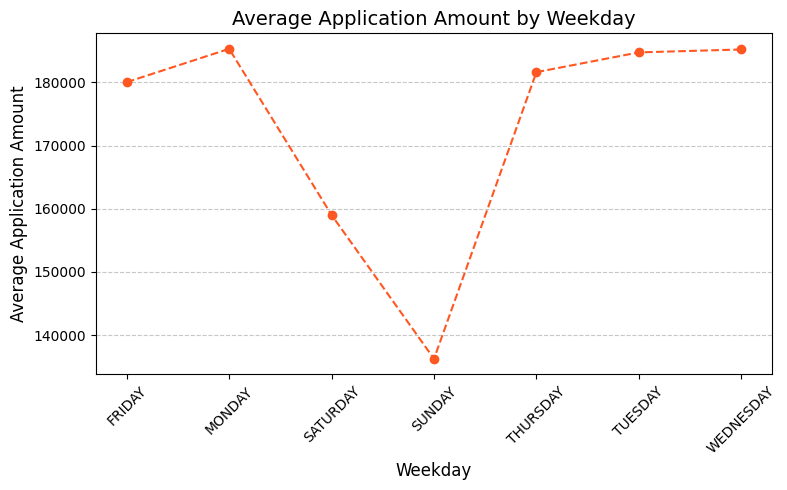

In [115]:
plt.figure(figsize=(8, 5))  
df_previousapp.groupby('WEEKDAY_APPR_PROCESS_START')['AMT_APPLICATION'].mean().plot(kind='line', color='#ff5722', marker='o', linestyle='--',)
plt.title('Average Application Amount by Weekday', fontsize=14)  
plt.xlabel('Weekday', fontsize=12)  
plt.ylabel('Average Application Amount', fontsize=12)  
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.xticks(rotation=45, fontsize=10) 
plt.tight_layout() 
plt.show()


Conclusion:-The average application amount varies slightly across weekdays, with no significant peaks or dips observed. This indicates that the application amounts remain relatively consistent regardless of the day of the week.

Bar Plot for Days-Related Features:-
This helps to understand if there are patterns related to the number of days, which might indicate different customer behaviors or loan characteristics.

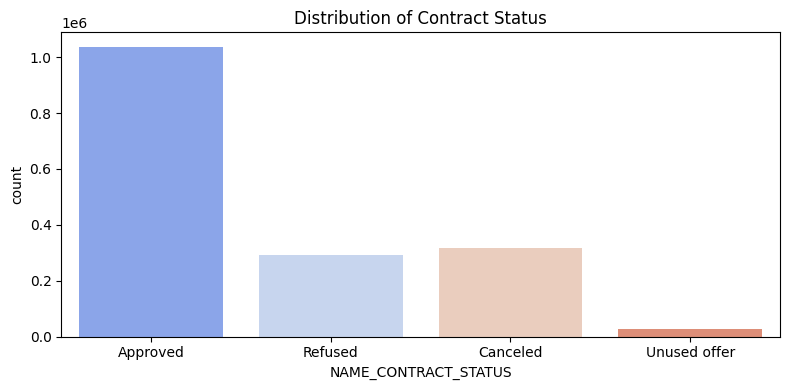

In [120]:
plt.figure(figsize=(8, 4))
sns.countplot(x='NAME_CONTRACT_STATUS', data=df_previousapp, palette='coolwarm')
plt.title('Distribution of Contract Status')
plt.tight_layout()
plt.show()

Conclusion:-The majority of contracts are approved, with only a small fraction being rejected. This indicates a high approval rate for loan applications in the dataset.

Count Plot:- NAME_CONTRACT_STATUS by NAME_CLIENT_TYPE Purpose: Show the distribution of contract statuses (approved/rejected) across different client types (NAME_CLIENT_TYPE).

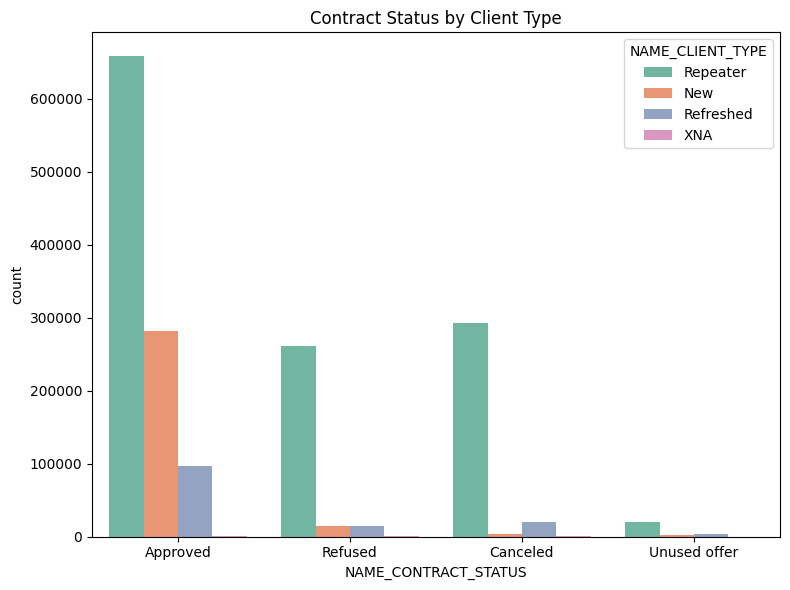

In [122]:
plt.figure(figsize=(8, 6))
sns.countplot(x='NAME_CONTRACT_STATUS', hue='NAME_CLIENT_TYPE', data=df_previousapp, palette='Set2')
plt.title('Contract Status by Client Type')
plt.tight_layout()
plt.show()

Conclusion:-The majority of contracts are approved for both new and returning clients, with a slightly higher approval rate for returning clients. Rejected contracts are more common among new clients.

Bar Plot:- Average AMT_CREDIT by NAME_GOODS_CATEGORY Purpose: Show the average credit amount (AMT_CREDIT) across different goods categorie

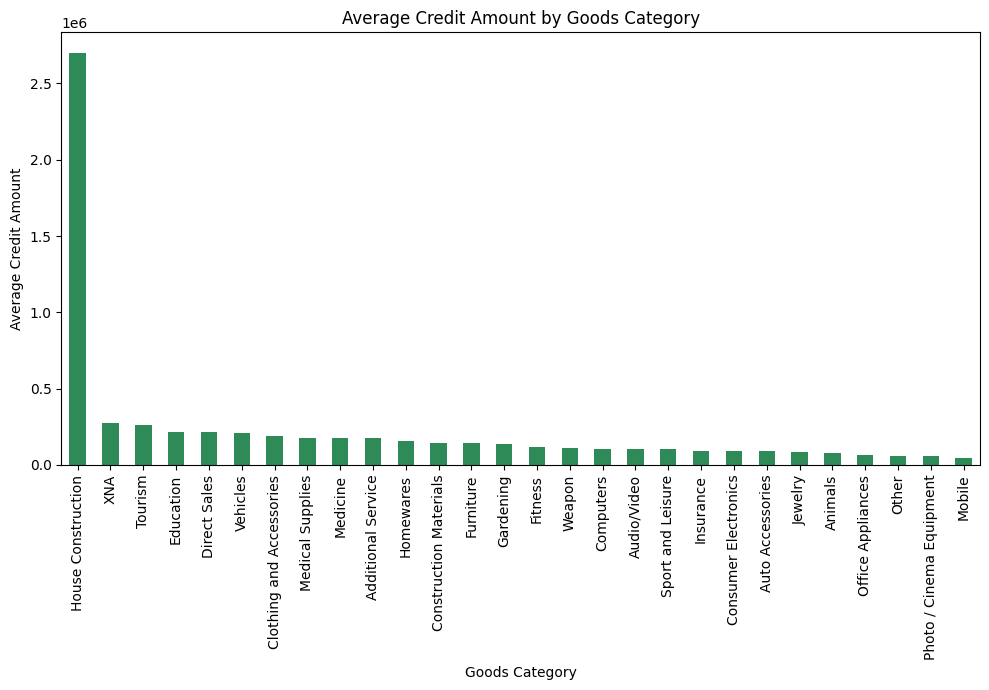

In [129]:
plt.figure(figsize=(10, 7))
avg_credit_by_category.plot(kind='bar', color='seagreen')
plt.title('Average Credit Amount by Goods Category')
plt.xlabel('Goods Category')
plt.ylabel('Average Credit Amount')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Conclusion:-The highest average credit amounts are allocated to categories like "Real Estate" Some categories with lower credit averages may represent lower-risk or smaller purchases.

### CONCLUSION:-

1)Gender and Default Rate:- The analysis shows that male customers tend to have a higher default rate compared to females. This insight can help target male customers with more focused risk management strategies.  
2)Income Type and Default Rate:- Customers with a stable income type, such as salaried individuals, tend to have a lower default rate. In contrast, clients in less stable income groups show higher default rates, indicating higher credit risk.    
3)Contract Type Distribution:- Most contracts are of a certain type, with the "Cash Loans" category being the most common. This highlights the prevalent loan type among clients and offers insights into loan preferences.   
4)Application Amount by Weekday:- The application amounts vary by weekday, with higher application amounts seen at the start of the week. This could be useful for adjusting loan processing or marketing strategies during these high-traffic periods.     
5)Contract Status by Client Type:- Returning clients have a higher approval rate for loans compared to new clients. This emphasizes the importance of focusing on returning clients for loan approvals.   
6)Average Credit by Goods Category:- Categories like "Real Estate" and "Vehicles" account for the highest average credit amounts. This suggests that these are high-value loans and should be monitored more closely for default risks.   
7)Key Insight on Default Risk:- Customers with higher credit amounts or those in riskier categories (e.g., new clients, low-income types) are more likely to default. Tailoring loan offerings and risk assessment strategies to these factors can improve creditworthiness evaluation.  

This analysis provides insights that can enhance decision-making around loan approvals, risk management, and customer targeting for banks or financial institutions.